# Gaia Star Query

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

In [1]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
import astroquery
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import astropy.units as u

In [4]:
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia

Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [5]:
gindex=0

In [6]:
Galaxy_Name=["lmc","smc"]

In [7]:
Galaxy_Delta_RA=[10.75,5.33]
Galaxy_Delta_DEC=[9.17,3.083]

In [8]:
GName=Galaxy_Name[gindex]
galaxy_delta_ra=Galaxy_Delta_RA[gindex]
galaxy_delta_dec=Galaxy_Delta_DEC[gindex]

In [9]:
result_table = Simbad.query_object(GName)
result_table.pprint(show_unit=True)

MAIN_ID      RA        DEC    ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"    "d:m:s"  ...                                            
-------- ---------- --------- ... -------- -------------- -------------------
NAME LMC 05 23 34.6 -69 45 22 ...        D              O 2003A&A...412...45P


In [10]:
Angle(result_table["RA"][0]+" hour")

<Angle 5.39294444 hourangle>

In [11]:
Angle(result_table["DEC"][0]+" degrees")

<Angle -69.75611111 deg>

In [12]:
galaxy_coord=SkyCoord(ra=result_table["RA"][0]+"hour",dec=result_table["DEC"][0]+ "degrees")
galaxy_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (80.89416667, -69.75611111)>

In [13]:
galaxy_ra=galaxy_coord.ra.deg
galaxy_dec=galaxy_coord.dec.deg

In [14]:
Gaia.ROW_LIMIT = -1
width = u.Quantity(0.01, u.deg)
height = u.Quantity(0.01, u.deg)
r = Gaia.query_object_async(coordinate=galaxy_coord, width=width, height=height)
r.pprint()

INFO: Query finished. [astroquery.utils.tap.core]
         dist         ...
                      ...
--------------------- ...
  0.00046837777838698 ...
 0.000532991830259734 ...
 0.000701920895774868 ...
0.0007610013305639609 ...
0.0010190008887011263 ...
 0.001104738980956511 ...
0.0011573615582263258 ...
0.0011694630579769584 ...
0.0011807404720021056 ...
0.0012290093441252616 ...
                  ... ...
0.0036998533681891206 ...
 0.003780028965648271 ...
0.0038259782711082225 ...
 0.004313021832845783 ...
 0.004421145721362649 ...
0.0044592028127244795 ...
 0.004555868750565277 ...
 0.004938595784277936 ...
  0.00499173202955947 ...
 0.005008319588548728 ...
Length = 44 rows


In [15]:
print(r.colnames)

['dist', 'solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_f

Text(0.5, 0.98, 'Magnitude in Gaia')

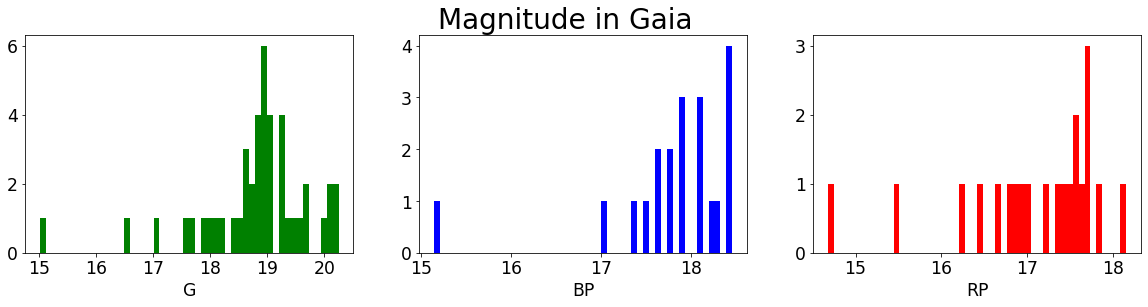

In [16]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax1.hist(r["phot_g_mean_mag"],bins=50,facecolor="g");
ax1.set_xlabel("G")
ax2=fig.add_subplot(132)
ax2.hist(r["phot_bp_mean_mag"],bins=50,facecolor="b");
ax2.set_xlabel("BP")
ax3=fig.add_subplot(133)
ax3.hist(r["phot_rp_mean_mag"],bins=50,facecolor="r");
ax3.set_xlabel("RP")
plt.suptitle("Magnitude in Gaia",fontsize=28)

In [ ]:
j = Gaia.cone_search_async(coordinate=galaxy_coord, radius=1.0*u.deg)
r = j.get_results()
r.pprint()

Text(0.5, 0.98, 'Magnitude in Gaia')

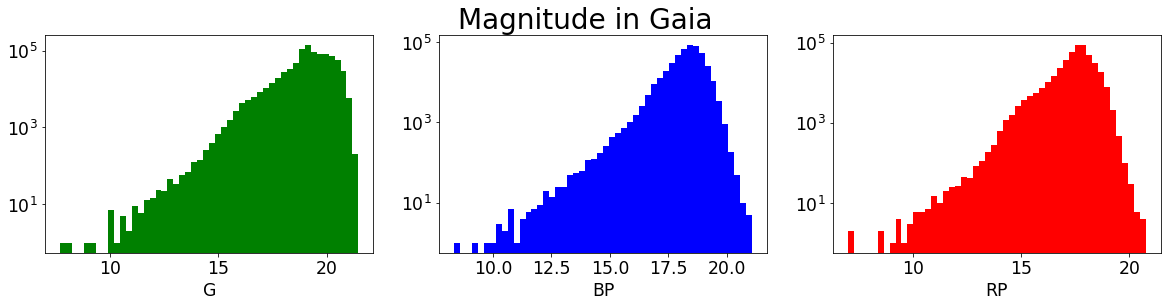

In [20]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax1.hist(r["phot_g_mean_mag"],bins=50,facecolor="g");
ax1.set_xlabel("G")
ax1.set_yscale("log")
ax2=fig.add_subplot(132)
ax2.hist(r["phot_bp_mean_mag"],bins=50,facecolor="b");
ax2.set_xlabel("BP")
ax2.set_yscale("log")
ax3=fig.add_subplot(133)
ax3.hist(r["phot_rp_mean_mag"],bins=50,facecolor="r");
ax3.set_xlabel("RP")
ax3.set_yscale("log")
plt.suptitle("Magnitude in Gaia",fontsize=28)